In [1]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/lykin22/movie-genre-data'
od.download(dataset_url)
     

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: muhammadhusban
Your Kaggle Key: ··········


100%|██████████| 44.0M/44.0M [00:01<00:00, 39.6MB/s]


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv("/content/movie-genre-data/kaggle_movie_train.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      22579 non-null  int64 
 1   text    22579 non-null  object
 2   genre   22579 non-null  object
dtypes: int64(1), object(2)
memory usage: 529.3+ KB


In [5]:
df = df.drop(columns = ["id"],axis =1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    22579 non-null  object
 1   genre   22579 non-null  object
dtypes: object(2)
memory usage: 352.9+ KB


In [7]:
df.head()

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,"t, summa cum laude and all. And I'm about to l...",comedy
2,"up Come, I have a surprise.... She takes him ...",drama
3,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,"nd dismounts, just as the other children reach...",drama


In [8]:
df.dropna(inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22579 entries, 0 to 22578
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    22579 non-null  object
 1   genre   22579 non-null  object
dtypes: object(2)
memory usage: 529.2+ KB


In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

genres = df['genre'].str.get_dummies(', ')
df = pd.concat([df['text'], genres], axis=1)

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=200, truncating='post')

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df.iloc[:,1:].values, test_size=0.2, random_state=42)

num_genres = y_train.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=32, input_length=200),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_genres, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
565/565 [==============================] - 99s 160ms/step - loss: 0.2741 - accuracy: 0.3888 - val_loss: 0.2630 - val_accuracy: 0.3826
Epoch 2/10
565/565 [==============================] - 83s 147ms/step - loss: 0.2618 - accuracy: 0.3962 - val_loss: 0.2642 - val_accuracy: 0.3981
Epoch 3/10
565/565 [==============================] - 83s 146ms/step - loss: 0.2391 - accuracy: 0.4999 - val_loss: 0.2358 - val_accuracy: 0.5022
Epoch 4/10
565/565 [==============================] - 84s 148ms/step - loss: 0.1890 - accuracy: 0.6343 - val_loss: 0.1651 - val_accuracy: 0.6980
Epoch 5/10
565/565 [==============================] - 91s 161ms/step - loss: 0.1175 - accuracy: 0.7967 - val_loss: 0.1199 - val_accuracy: 0.7848
Epoch 6/10
565/565 [==============================] - 85s 150ms/step - loss: 0.0851 - accuracy: 0.8514 - val_loss: 0.1040 - val_accuracy: 0.8144
Epoch 7/10
565/565 [==============================] - 84s 148ms/step - loss: 0.0659 - accuracy: 0.8837 - val_loss: 0.1015 - val_ac

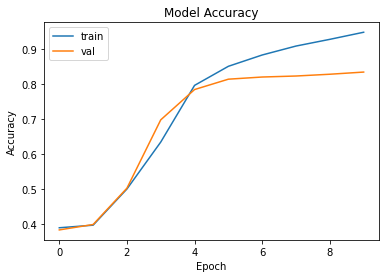

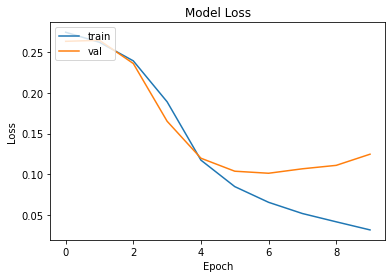

In [17]:
# Visualize data
import matplotlib.pyplot as plt
# Visualize accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Visualize loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

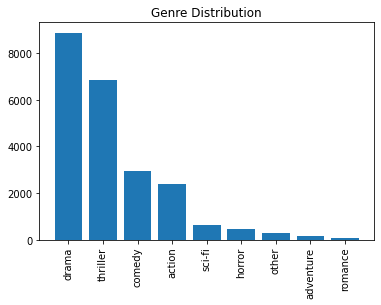

In [18]:
import matplotlib.pyplot as plt

genre_counts = df.iloc[:,1:].sum(axis=0).sort_values(ascending=False)
plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=90)
plt.title("Genre Distribution")
plt.show()


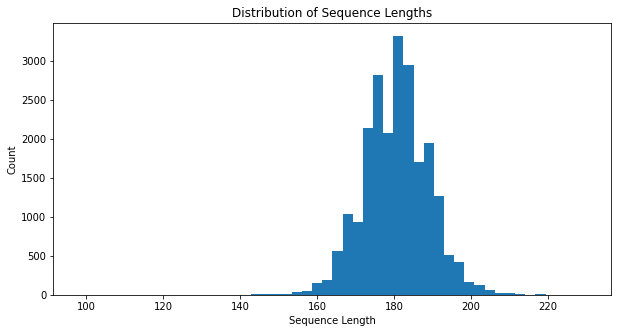

In [20]:

plt.figure(figsize=(10,5))
plt.hist([len(seq) for seq in sequences], bins=50)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.show()


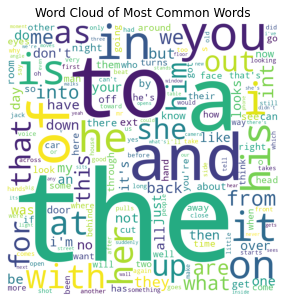

In [19]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=200).generate_from_frequencies(tokenizer.word_counts)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('Word Cloud of Most Common Words')
plt.axis('off')
plt.show()

In [11]:
# save tokenizer
import json
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))
